In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from layers import *
from activations import *
from metrics import *
from optimizers import *
from model import Model

In [4]:
URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "fashion_mnist_images"

In [3]:
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

In [6]:
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images...


In [2]:
def load_mnist_dataset(dataset, path):
    labels = os.listdir(os.path.join(path, dataset))
    X = []
    y = []
    
    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)            
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    return X, y, X_test, y_test

In [3]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [4]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [5]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


In [6]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Class: 2


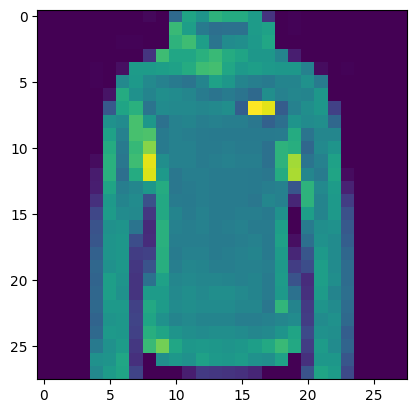

In [7]:
c = 7

print("Class:", y[c])
plt.imshow((X[c].reshape(28, 28)))
plt.show()

In [8]:
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-3),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X_test, y_test),
    epochs=1, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.070, loss: 3.589 (data_loss: 3.589,reg_loss: 0.000), lr: 0.001
    step: 100, acc: 0.750, loss: 0.589 (data_loss: 0.589,reg_loss: 0.000), lr: 0.0009090909090909091
    step: 200, acc: 0.812, loss: 0.459 (data_loss: 0.459,reg_loss: 0.000), lr: 0.0008333333333333334
    step: 300, acc: 0.797, loss: 0.590 (data_loss: 0.590,reg_loss: 0.000), lr: 0.0007692307692307692
    step: 400, acc: 0.852, loss: 0.564 (data_loss: 0.564,reg_loss: 0.000), lr: 0.0007142857142857143
    step: 468, acc: 0.865, loss: 0.491 (data_loss: 0.491,reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.777, loss: 0.619 (data_loss: 0.619, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.842,loss: 0.438



In [9]:
model.evaluate(X, y) # Use test set

Evaluation, acc: 0.853, loss: 0.400


In [10]:
model.save("model.m")
model = Model.load("model.m")

In [15]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

confidences = model.predict(X_test[:1])
print(confidences)

predictions = model.output_layer_activation.predictions(confidences)
prediction = fashion_mnist_labels[predictions[0]]
print(prediction)

[[1.94957465e-03 1.49101570e-03 4.97179274e-02 9.57964342e-03
  8.77477177e-01 5.69132462e-04 5.63873105e-02 6.66696214e-04
  1.61414357e-03 5.47378802e-04]]
Coat
